<div style="background-color: purple; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 20px; font-weight: bold;">
        1. Description
   </p>
</div>


<div style="background-color: purple; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 15px; font-weight: bold;">
        This dataset contains information about patients with heart disease. It includes information such as age, sex, chest pain type, resting blood pressure, cholesterol levels, fasting blood sugar levels, resting electrocardiographic results, maximum heart rate achieved, exercise induced angina, oldpeak (ST depression induced by exercise relative to rest), slope of the peak exercise ST segment, number of major vessels colored by fluoroscopy, thalassemia (a type of blood disorder), and the presence or absence of heart disease.
   </p>
</div>


 Columns :
* index: Unique identifier for each row in the dataframe.
* age: Age of the patient.
* sex: Gender of the patient 
* cp: Chest pain type 
* trtbps: Resting blood pressure 
* chol: Serum cholesterol in mg/dl.
* fbs: Fasting blood sugar 
* restecg: Resting electrocardiographic results 
* thalachh: Maximum heart rate achieved.
* exng: Exercise induced angina 
* oldpeak: ST depression induced by exercise relative to rest.
* slp: Slope of the peak exercise ST segment 
* caa: Number of major vessels 
* thall: Thalassemia 
* output: Diagnosis of heart disease (1 = true; 0 = false).

<div style="background-color: purple; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 20px; font-weight: bold;">
        2. Import Libraries
    </p>
</div>


In [1]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from colorama import Fore, init
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.metrics import auc
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

<div style="background-color: purple; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 22px; font-weight: bold;">
        3. Load Data
    </p>
</div>


In [2]:
df = pd.read_csv("heart.csv")
df.head()

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


<Axes: >

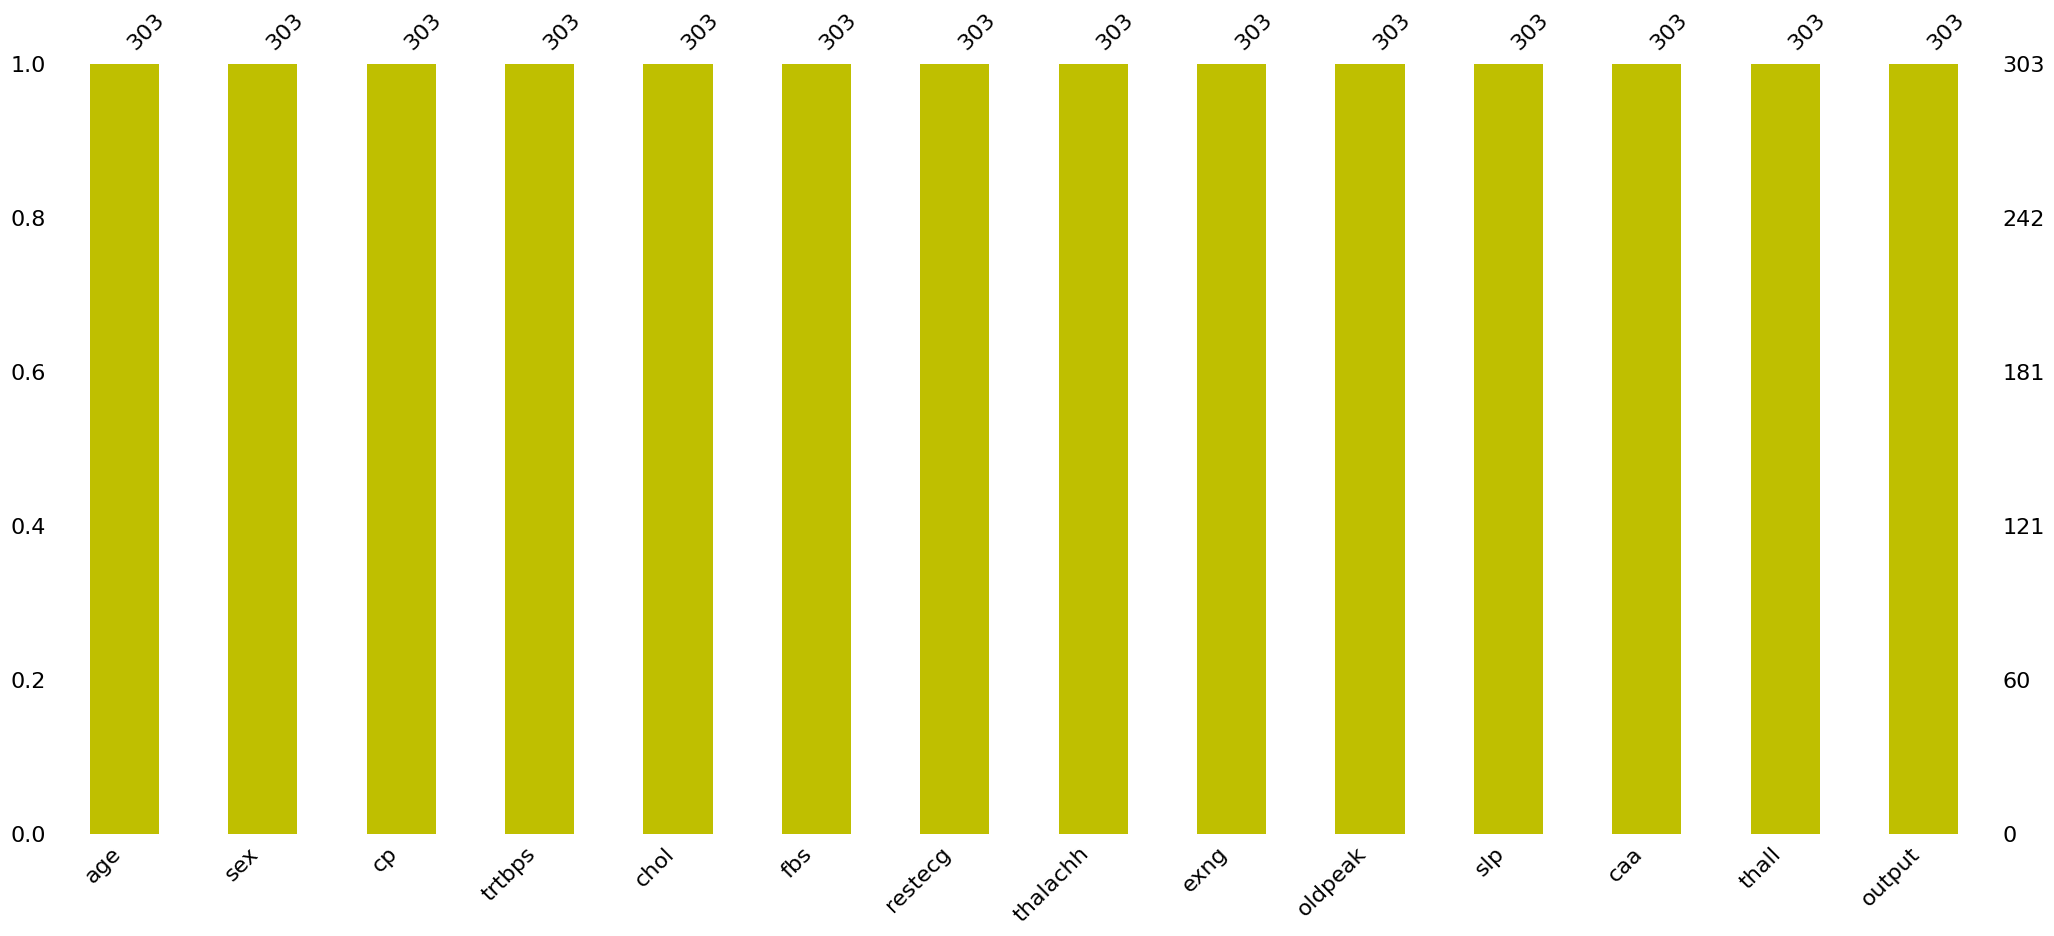

In [4]:
msno.bar(df, color = 'y')

In [5]:
  df.duplicated().sum()

1

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
print(f"Summary Of The Dataset with numerical columns :")
df.describe().style.set_properties(**{"background-color": "#121d6b","color":"#e9c46a","border": "1.5px solid black"})

Summary Of The Dataset with numerical columns :


In [8]:
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

age: 41 distinct values
sex: 2 distinct values
cp: 4 distinct values
trtbps: 49 distinct values
chol: 152 distinct values
fbs: 2 distinct values
restecg: 3 distinct values
thalachh: 91 distinct values
exng: 2 distinct values
oldpeak: 40 distinct values
slp: 3 distinct values
caa: 5 distinct values
thall: 4 distinct values
output: 2 distinct values


<div style="background-color: purple; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 20px; font-weight: bold;">
        4. Exploration Data 
    </p>
</div>


In [9]:
df_numericals = df.select_dtypes(['int64','float64'])
numericals = [i for i in df_numericals.columns]
print('numericals: ', numericals)

numericals:  ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output']


In [10]:
df1 = df.copy()


"The data regarding heart attacks is imbalanced, with the number of observations experiencing a heart attack totaling 164, while those not experiencing a heart attack amount to only 138. This condition creates an imbalance in the class distribution, where the 'Heart Attack' class constitutes the majority, while the 'No Heart Attack' class is in the minority. This imbalance can impact the performance of machine learning models, as models tend to be biased towards predicting the majority class. Therefore, strategies for handling imbalanced data may be necessary to enhance the predictive quality of the model, such as oversampling or undersampling        "
  


<div style="background-color: purple; padding: 10px; border-radius: 5px;">
    <p style="color: white; font-size: 16px; font-weight: bold;">
        5.2 Outliers
    </p>
</div>


In [11]:
X = df1.drop('output', axis=1)
y = df1['output']

<div style="background-color: purple; padding: 10px; border-radius: 5px;">
    <p style="color: white; font-size: 14px; font-weight: bold;">
        MinMax and SMOTE
    </p>
</div>


In [12]:
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# smote = SMOTE(random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Display descriptive statistics
X_scaled.describe().T.style.background_gradient(axis=0, cmap='Set3')

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


<div style="background-color: purple; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 20px; font-weight: bold;">
        Modeling
    </p>
</div>


<div style="background-color: purple; padding: 10px; border-radius: 5px;">
    <p style="color: white; font-size: 16px; font-weight: bold;">
      Random Forest Classfier   
    </p>
</div>


In [47]:
X_train

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
132   42    1   1     120   295    0        1       162     0      0.0    2   
203   68    1   2     180   274    1        0       150     1      1.6    1   
197   67    1   0     125   254    1        1       163     0      0.2    1   
75    55    0   1     135   250    0        0       161     0      1.4    1   
177   64    1   2     140   335    0        1       158     0      0.0    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
189   41    1   0     110   172    0        0       158     0      0.0    2   
71    51    1   2      94   227    0        1       154     1      0.0    2   
106   69    1   3     160   234    1        0       131     0      0.1    1   
271   61    1   3     134   234    0        1       145     0      2.6    1   
102   63    0   1     140   195    0        1       179     0      0.0    2   

     caa  thall  
132    0      2  
203    0      3  
197    2      3  
75     0      2  
177    0      2  
..   ...    ...  
189    0      3  
71     1      3  
106    1      2  
271    2      2  
102    2      2  

[241 rows x 13 columns]

In [15]:
m3 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=20, random_state=12,max_depth=5)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))

confussion matrix
[[24  5]
 [ 5 27]]


Accuracy of Random Forest: 83.60655737704919 

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



<div style="background-color: white; padding: 10px; border-radius: 5px; color: #0000FF;">
    <p style="font-size: 16px; font-weight: bold;">
        Best Model is Random Forest : 0.86
   </p>
</div>


<div style="background-color: purple; padding: 10px; border-radius: 5px;">
    <p style="color: white; font-size: 16px; font-weight: bold;">
        6.2 Hyperparameters Grid Search
    </p>
</div>


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)


rf_best = grid_search.best_estimator_
y_pred = rf_best.predict(X_test)


print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.92        29
           1       0.94      0.91      0.92        32

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61



<div style="background-color: white; padding: 10px; border-radius: 5px; color: #0000FF;">
    <p style="font-size: 16px; font-weight: bold;">
        Tuning Hyperparameters Random Forest : 0.92
   </p>
</div>


<div style="background-color: purple; padding: 10px; border-radius: 5px;">
    <p style="color: white; font-size: 16px; font-weight: bold;">
        6.3 Confusion Matrix
    </p>
</div>


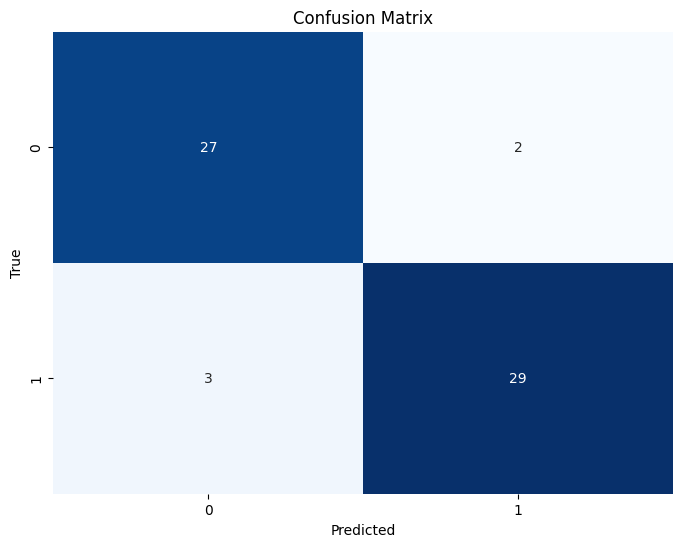

In [17]:
y_pred = rf_best.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


<div style="background-color: purple; padding: 10px; border-radius: 5px;">
    <p style="color: white; font-size: 16px; font-weight: bold;">
        6.4 Receiver Operator Characteristic (ROC)
    </p>
</div>


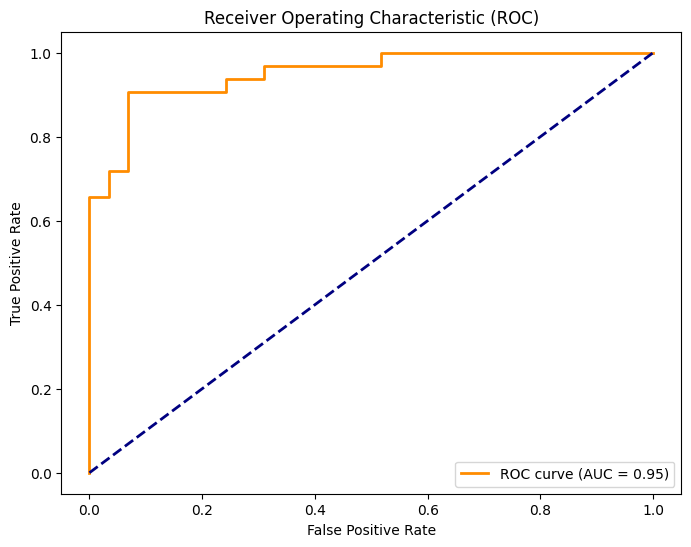

In [18]:
y_pred_proba = rf_best.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


Another common metric is the Area Under the Curve, or AUC. This is a convenient way to capture the performance of a model in a single number, although it's not without certain issues. As a rule of thumb, an AUC can be classed as follows,

* 0.90 - 1.00 = excellent
* 0.80 - 0.90 = good
* 0.70 - 0.80 = fair
* 0.60 - 0.70 = poor
* 0.50 - 0.60 = fail

In [56]:
# Assuming new_data is a dictionary
# new_data = {'age': 67, 'sex': 1, 'cp': 0, 'trtbps': 160, 'chol': 286, 'fbs': 0,
#             'restecg': 0, 'thalachh': 108, 'exng':1, 'oldpeak': 1.5, 'slp': 1,
#             'caa':3, 'thall': 2}

new_data = {'age': 41, 'sex': 1, 'cp': 1, 'trtbps': 120, 'chol': 157, 'fbs': 0,
            'restecg': 0, 'thalachh': 182, 'exng':0, 'oldpeak': 0, 'slp': 2,
            'caa':0, 'thall': 2}

new_data_scaled = np.array([[new_data[feature] for feature in X_train.columns]])

# Make predictions
prediction = rf_best.predict_proba(new_data_scaled)

print("Predicted class:", prediction)

Predicted class: [[0.04127273 0.95872727]]


In [50]:
new_data_scaled

array([[43. ,  0. , 14. ,  5. , 66. ,  0. ,  0. , 77. ,  1. ,  7.4,  1. ,
         3. ,  2. ]])

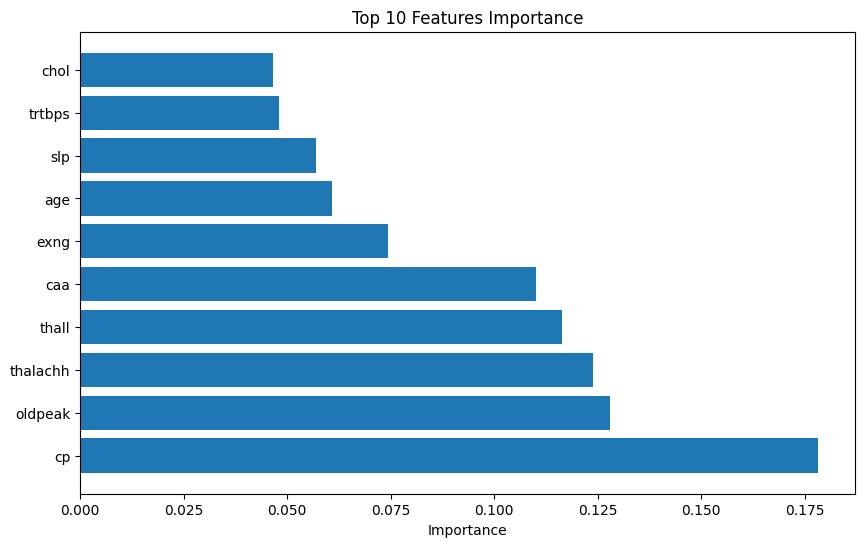

Feature Importance:
     Feature  Importance
2         cp    0.178243
9    oldpeak    0.127916
7   thalachh    0.123869
12     thall    0.116385
11       caa    0.110148


In [25]:
rf_best.fit(X, y)

feature_importances = rf_best.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:10], feature_importance_df['Importance'][:10])
plt.xlabel('Importance')
plt.title('Top 10 Features Importance')
plt.show()

print("Feature Importance:")
print(feature_importance_df.head())

In [33]:
probabilities = rf_best.predict_proba(new_data_scaled)
custom_threshold = 0.6  # Adjust the threshold as needed
custom_predictions = (probabilities[:, 1] >= custom_threshold).astype(int)
print("Predicted class with custom threshold:", custom_predictions)

Predicted class with custom threshold: [1]


In [34]:
probabilities

array([[0.36832044, 0.63167956]])

In [64]:
import joblib
save_at = 'heartattack_rf92.joblib'
# save
# joblib.dump(rf_best, save_at)

In [65]:
# load
loaded_rf = joblib.load(save_at)

In [66]:
# Assuming new_data is a dictionary
new_data = {'age': 67, 'sex': 1, 'cp': 0, 'trtbps': 160, 'chol': 286, 'fbs': 0,
            'restecg': 0, 'thalachh': 108, 'exng':1, 'oldpeak': 1.5, 'slp': 1,
            'caa':3, 'thall': 2}

# new_data = {'age': 41, 'sex': 1, 'cp': 1, 'trtbps': 120, 'chol': 157, 'fbs': 0,
#             'restecg': 0, 'thalachh': 182, 'exng':0, 'oldpeak': 0, 'slp': 2,
#             'caa':0, 'thall': 2}

new_data_scaled = np.array([[new_data[feature] for feature in X_train.columns]])

# Make predictions
prediction = loaded_rf.predict_proba(new_data_scaled)

print("Predicted class:", prediction)

Predicted class: [[0.93141126 0.06858874]]


In [67]:
new_data_scaled

array([[ 67. ,   1. ,   0. , 160. , 286. ,   0. ,   0. , 108. ,   1. ,
          1.5,   1. ,   3. ,   2. ]])

In [76]:
namepay_array = np.array([list(new_data.values())])
print(namepay_array)

[[ 67.    1.    0.  160.  286.    0.    0.  108.    1.    1.5   1.    3.
    2. ]]


In [77]:
namepay_array

array([[ 67. ,   1. ,   0. , 160. , 286. ,   0. ,   0. , 108. ,   1. ,
          1.5,   1. ,   3. ,   2. ]])